In [68]:
import networkx as nx
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import animation

betaJ = 0.8
colorDict = {-1: "red", 1: "blue"}
class Ising:
    def __init__(self, beta_j):
        #initialize Graph object and spins
        super(Ising,self).__init__()
        self = nx.fast_gnp_random_graph(10, 0.2)
        self.spins = np.random.choice([-1,1], len(self.G.nodes))
        #define layout
        self.pos = nx.spring_layout(self.G)
        #self.colorMap = [colorDict[element] for element in self.spins]
        

#G = Ising(0.08)
#fig, ax = plt.subplots(figsize=[6,4])


G = nx.fast_gnp_random_graph(10, 0.2)

In [66]:
N = 100

#init spins
spins = np.random.choice([-1,1], size=[N,N])

#choose a spin to flip
x,y = np.random.choice(np.arange(N), size=2)

#find it's neighbours, periodic boundary conditions apply

#the idea of this table management trick comes from this interesting piece of code: Most efficient game of life simulation
# https://github.com/armytricks/GameOfLife/blob/master/GameOfLifeSimulation/main.cpp
#I found this solution fascinating when I was working with table based simulations earlier.

xLeft = N-1 if x==0 else -1
xRight = -(N-1) if x==N-1 else 1
yAbove = N-1 if y==0 else -1
yBelow = -(N-1) if y==N-1 else 1

#kernels like in convolution
kernel_x = np.array([xLeft, 0, xRight,
                     xLeft,    xRight,
                     xLeft, 0, xRight])
                     
kernel_y = np.array([yAbove, yAbove, yAbove,
                          0,              0,
                     yBelow, yBelow, yBelow])

neighbours = spins[x+kernel_x, y+kernel_y]

#calculate Delta E energy
dEnergy = 2* spins[x,y] * sum(neighbours)

#make a step based on energy
if dEnergy < 0:
    spins[x,y] *= -1 #certrainly flip a spin

elif dEnergy == 0:
    spins[x,y] *= np.random.choice([-1,1]) #flip a spin with 1/2 probability

elif dEnergy > 0:
    spins[x,y] *= np.random.choice([-1,1] , p= [np.exp(-betaJ * dEnergy) , 1 - np.exp(-betaJ * dEnergy)]) #flip a spin with exp(-beta * dEnergy) chance

4

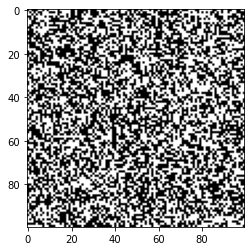

In [98]:
plt.imshow(spins,cmap="gray")

In [102]:
def calcEnergy():
    '''
    choose a spin to flip, and calculate the change in energy accordingly
    '''
    x,y = np.random.choice(np.arange(N), size=2)

    #find it's neighbours, periodic boundary conditions apply

    #the idea of this table management trick comes from this interesting piece of code: Most efficient game of life simulation
    # https://github.com/armytricks/GameOfLife/blob/master/GameOfLifeSimulation/main.cpp
    #I found this solution fascinating when I was working with table based simulations earlier.

    xLeft = N-1 if x==0 else -1
    xRight = -(N-1) if x==N-1 else 1
    yAbove = N-1 if y==0 else -1
    yBelow = -(N-1) if y==N-1 else 1

    #kernels like in convolution
    kernel_x = np.array([xLeft, 0, xRight,
                        xLeft,    xRight,
                        xLeft, 0, xRight])
                        
    kernel_y = np.array([yAbove, yAbove, yAbove,
                            0,              0,
                        yBelow, yBelow, yBelow])

    neighbours = spins[x+kernel_x, y+kernel_y]

    #calculate Delta E energy
    dEnergy = 2* spins[x,y] * sum(neighbours)

    return dEnergy

def makeStep(dEnergy):
    '''
    make a step based on energy
    '''
    if dEnergy <= 0:
        spins[x,y] *= -1 #certrainly flip a spin

    else:
        spins[x,y] *= np.random.choice([-1,1] , 
                    p= [np.exp(-betaJ * dEnergy) , 1 - np.exp(-betaJ * dEnergy)]) #flip a spin with exp(-beta * dEnergy) chance

In [106]:
def anim_2dIsing():
    dE = calcEnergy()
    makeStep(dE)
    plt.imshow(spins, cmap="gray")


In [129]:
def abc():
    global qqq, qqqq
    qqq = 15
    qqqq = 65
abc()
print(qqq)
qqqq

15


65

In [131]:
fig, ax = plt.subplots(figsize=[8,6])
dE = calcEnergy()
makeStep(dE)
plt.imshow(spins, cmap="gray")


TypeError: inner() got multiple values for argument 'ax'

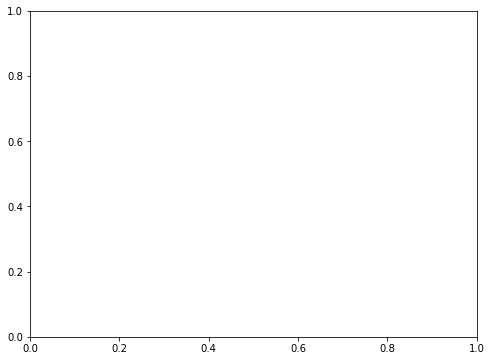

In [107]:
fig, ax = plt.subplots(figsize=[8,6])
ani = animation.FuncAnimation(fig, anim_2dIsing, frames=10)

In [49]:
N = 6
x = 5
y = 5

xLeft = N-1     if x==0     else -1
xRight = -(N-1) if x==N-1   else 1
yAbove = N-1    if y==0     else -1
yBelow = -(N-1) if y==N-1   else 1

#kernels like in convolution
kernel_x = np.array([xLeft, 0, xRight,
                     xLeft,    xRight,
                     xLeft, 0, xRight])

kernel_y = np.array([yAbove, yAbove, yAbove,
                          0,              0,
                     yBelow, yBelow, yBelow])



In [53]:
spins[x + kernel_x , y+kernel_y]

TypeError: tuple indices must be integers or slices, not tuple

In [7]:
q = np.random.randint(-90,90, size=[6,6])
q

array([[-49, -87,  71,  85, -15,  82],
       [  9,  40, -61,  72,  43,  45],
       [-11,  82, -33,  15,  -3,  55],
       [ 38, -57,  45,  53,   8, -73],
       [-76, -19,  57,   9,  20,  70],
       [ 34,  -5, -43,   7, -53, -60]])

1.0